In [385]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from imblearn.over_sampling import SMOTE
import smogn
from sklearn.model_selection import StratifiedShuffleSplit

In [542]:
df = pd.read_csv("imputation_test.csv")

In [543]:
df = df.round(5)

In [544]:
df_for_prediction = df[df["size"].isna()]
df_for_training = df[~df["size"].isna()]

In [545]:
df_for_training = df_for_training.dropna().reset_index(drop = True)

In [546]:
df_for_training = df_for_training[~(df_for_training["size"]<100)]

In [532]:
import pandas as pd

# Set your threshold value and column name
threshold_value_1 = 10000
threshold_value_2 = 1000
column_name = 'size'

# # Drop duplicate rows based on the condition
# df_for_training = df_for_training[~(df_for_training.duplicated(subset=column_name) & 
#                                     ((df_for_training[column_name] < threshold_value_1) & 
#                                     (df_for_training[column_name] > threshold_value_2)) )]
df_for_training =df_for_training[~((df_for_training.duplicated(subset=column_name)) & 
                                     
                                    (df_for_training[column_name] > threshold_value_2))]

In [547]:
columns_to_drop = ['hh_id','month','year','lusage','mozip','children',
 'owner',
 'income6',
 'hhsize3',
 'income7',
 'hhsize4',
 'income3',
 'income4',
 'hhsize5',
 'income9',
 'hhsize5plus',
 'income2',
 'income8']
df_for_training = df_for_training.drop(columns=columns_to_drop)

In [548]:
df_for_training = df_for_training.drop_duplicates().reset_index(drop = True)

In [549]:
df_for_training = df_for_training.sort_values(by =["size"]).reset_index(drop = True)


In [562]:
df_for_training [(df_for_training ["size"] < 10000) & (df_for_training ["size"] > 1000)]

,zipcode,luse1,luse2,luse3,luse4,luse5,luse6,hhsize2,income5,size
1149,54.0,5.15559,4.95454,4.91437,4.90144,4.85384,4.89557,0,1.0,1001.0
1150,59.0,6.03304,6.08157,6.21728,6.52329,6.75444,5.97688,1,0.0,1002.0
1151,42.0,6.16131,6.30984,6.63346,7.03296,6.98489,6.34470,0,0.0,1002.0
1152,15.0,5.08829,5.32351,5.61797,6.01114,6.00559,5.65351,0,0.0,1005.0
1153,57.0,6.44648,6.44591,7.12048,7.09848,7.18747,6.62762,0,0.0,1006.0
...,...,...,...,...,...,...,...,...,...,...
15687,1.0,6.41086,6.34675,6.20899,6.22774,6.27118,6.21842,1,0.0,9997.0
15688,25.0,6.46809,6.43133,6.44368,6.60412,6.72882,6.39567,0,0.0,9997.0
15689,54.0,6.47206,6.28491,6.34735,6.64906,6.79731,6.41232,0,0.0,9998.0
15690,52.0,6.11458,6.38767,6.29667,6.65855,6.82750,6.52783,0,0.0,9999.0


In [564]:
df_for_training [(df_for_training ["size"] < 1000)]

,zipcode,luse1,luse2,luse3,luse4,luse5,luse6,hhsize2,income5,size
0,28.0,6.35266,6.52132,6.65141,6.94741,7.03187,6.71478,1,0.0,100.0
1,49.0,5.75439,5.83289,5.99303,6.42469,6.59886,5.84068,1,0.0,100.0
2,52.0,5.79684,6.02853,6.14556,6.47221,6.55040,6.16455,1,0.0,100.0
3,1.0,6.89719,7.05735,7.57469,7.78077,7.89818,7.52851,0,0.0,100.0
4,1.0,7.01342,7.08935,7.54015,7.70901,7.85176,7.22692,0,0.0,101.0
...,...,...,...,...,...,...,...,...,...,...
1143,1.0,6.20862,6.07787,6.49505,6.71513,6.76153,6.09862,0,0.0,996.0
1144,54.0,6.64986,6.59507,6.43262,6.58222,6.53907,6.41276,0,1.0,998.0
1145,1.0,6.10650,6.02619,6.20496,6.35437,6.37690,6.02946,1,0.0,999.0
1146,15.0,6.77411,6.74060,7.12509,7.65087,7.81517,7.39763,0,0.0,999.0


In [565]:
df_for_training[(df_for_training ["size"] > 10000)]

,zipcode,luse1,luse2,luse3,luse4,luse5,luse6,hhsize2,income5,size
15694,1.0,6.56519,6.54247,6.55342,6.48205,6.63068,6.46436,1,1.0,10001.0
15695,28.0,6.72116,6.41114,6.51446,6.76258,6.79575,6.53904,0,0.0,10001.0
15696,53.0,6.23417,5.86228,5.82698,5.91852,5.97916,5.91638,1,0.0,10001.0
15697,49.0,6.68268,6.68307,6.68292,7.04916,7.15573,6.70622,0,0.0,10001.0
15698,25.0,6.31948,6.26554,6.28346,6.48252,6.62744,6.41548,0,0.0,10002.0
...,...,...,...,...,...,...,...,...,...,...
22191,57.0,7.26979,6.39977,6.17593,6.40754,6.32177,6.31591,0,0.0,19996.0
22192,15.0,7.24002,6.37314,6.14823,5.89936,5.93854,5.90738,0,0.0,19996.0
22193,53.0,7.09888,5.69688,5.63504,5.78927,5.63134,5.76703,0,0.0,19999.0
22194,1.0,7.06204,6.52229,6.17502,6.27571,6.34642,6.39258,0,0.0,19999.0


In [521]:
train_data = pd.concat([train_data,train_data[(train_data ["size"] < 1000)]])

In [522]:
train_data = train_data.sample(frac=1, random_state=42)

In [397]:
# df_for_training  = df_for_training .sort_values(by='size', ascending=True)

In [553]:
X,y = df_for_training.iloc[:,:-1],df_for_training.iloc[:,-1]

In [554]:
columns_to_scale = ['luse1','luse2','luse3','luse4','luse5', 'luse6']

In [ ]:
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.2, random_state=42)

In [555]:
X_train, X_test, y_train , y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [430]:
special_df = df_for_training.drop_duplicates()

In [431]:
_, X_test, _ , y_test = train_test_split(special_df.iloc[:,:-1],special_df.iloc[:,-1], test_size=0.25, random_state=42)

In [558]:
X_train_array = X_train.values
X_test_array = X_test.values

# Check for identical rows between the training and test sets
duplicate_rows = [row for row in X_test_array if any((row == X_train_array).all(axis=1))]
num_duplicate_rows = len(duplicate_rows)


In [559]:
num_duplicate_rows

0

In [436]:
test_data = pd.concat([X_test, y_test], axis=1)
train_data = pd.concat([X_train, y_train], axis=1)

In [443]:
test_data = test_data[~((test_data["luse1"].isin(train_data["luse1"])) &(test_data["luse2"].isin(train_data["luse2"])))]

In [445]:
X_test, y_test = test_data.iloc[:,:-1],test_data.iloc[:,-1]

In [423]:
test_data = pd.concat([X_train, y_train], axis=1)

In [424]:
test_data = test_data.drop_duplicates()

In [425]:
X_test, y_test = test_data.iloc[:,:-1],test_data.iloc[:,-1] 

In [451]:
train_data = pd.concat([X_train, y_train], axis=1)
interest_data = train_data[train_data["size"] < 100]

In [457]:
train_smogn["zipcode"] = round(train_smogn["zipcode"],0)

In [465]:
train_smogn = train_smogn
for k in range(10):
    print(k)
    train_smogn = smogn.smoter(
        data=train_smogn.dropna().reset_index(drop=True),
        y="size",
        samp_method = 'extreme',# Adjust this parameter based on your dataset characteristics
        rel_thres=0.01, # Adjust this parameter based on your desired number of rows
        rel_coef = .4
    )

0


r_index: 100%|##########| 96/96 [00:00<00:00, 982.51it/s]


1


r_index: 100%|##########| 37/37 [00:00<00:00, 788.37it/s]


2


r_index: 100%|##########| 235/235 [00:00<00:00, 962.96it/s]


ValueError: oops! synthetic data contains missing values

In [467]:
train_data = pd.concat([train_data, train_smogn])

In [497]:
train_data = pd.concat([train_data]*5,ignore_index=True)

In [509]:
train_data = pd.concat([train_data,train_data[train_data["size"] < 10000]])

In [523]:
X_train,y_train =  train_data.iloc[:,:-1],train_data.iloc[:,-1] 

In [76]:
X_train = pd.concat([X_train,train_smogn.iloc[:,:-1]])
y_train = pd.concat([y_train,train_smogn.iloc[:,-1]])

In [556]:
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

# Standardize target variable
sc_y = StandardScaler()
y_train_scaled = sc_y.fit_transform(np.array(y_train).reshape(-1, 1)).ravel()
y_test_scaled = sc_y.transform(np.array(y_test).reshape(-1, 1)).ravel()

In [561]:
X_train

,zipcode,luse1,luse2,luse3,luse4,luse5,luse6,hhsize2,income5
1023,28.0,6.32273,6.79794,7.02182,7.01543,6.98099,6.77289,0,0.0
19658,28.0,6.69036,6.18682,6.06512,6.15312,6.19137,6.29316,1,0.0
20960,28.0,6.46751,6.38760,6.23858,6.21871,6.27220,6.34826,0,0.0
16760,57.0,6.53130,6.60923,6.56182,6.55031,6.61419,6.46748,0,0.0
5216,28.0,6.71495,6.86177,7.20657,7.50359,7.43210,7.08994,1,0.0
...,...,...,...,...,...,...,...,...,...
11964,28.0,6.43909,6.41623,6.49749,6.89089,6.95519,6.52485,0,0.0
21575,28.0,5.53634,5.52054,5.26828,5.47660,5.72912,5.38128,0,0.0
5390,1.0,6.15804,6.25026,6.43590,6.65446,6.92746,6.35458,0,0.0
860,42.0,6.54416,6.85558,7.14551,7.25405,7.22411,6.88131,0,0.0


In [557]:
# Specify hyperparameters
xgb_reg = XGBRegressor(
    objective='reg:squarederror', 
    max_depth=50, 
    learning_rate=0.1, 
    n_estimators=300
)

# Train the XGBoost model
xgb_reg.fit(X_train_scaled, y_train_scaled )

# Make predictions on the test set
y_pred_xgb = xgb_reg.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(sc_y.inverse_transform([y_test_scaled]), sc_y.inverse_transform([y_pred_xgb]))
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1060790.2875556508


In [566]:
# for l,m in zip(sc_y.inverse_transform([y_pred_xgb])[0],sc_y.inverse_transform([y_test_scaled])[0]):
#     print(l,m)

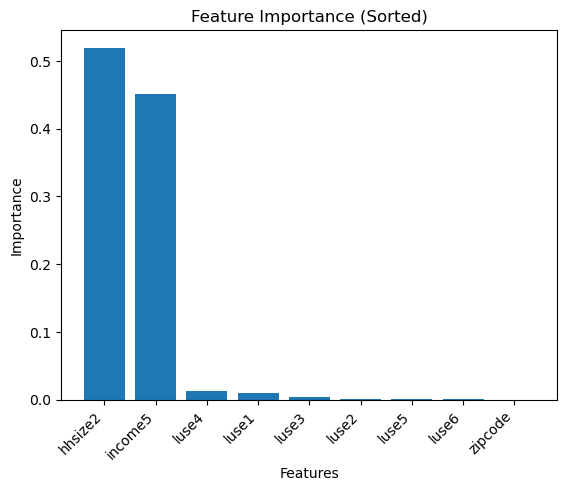

In [255]:
feature_importances = xgb_reg.feature_importances_
feature_names = X.columns

# Create a dictionary to store feature names and their importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort features based on importance in descending order
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract sorted feature names and importances
sorted_feature_names, sorted_feature_importances = zip(*sorted_features)

# Create a bar plot to visualize sorted feature importances
plt.bar(sorted_feature_names, sorted_feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (Sorted)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [170]:
# for k,l,m in zip(sc_y.inverse_transform([y_pred])[0],sc_y.inverse_transform([y_pred_xgb])[0],sc_y.inverse_transform([y_test_scaled])[0]):
#     print(k,l,m)

In [769]:
# Standardize the selected columns
scaler_x = StandardScaler()
X_train[columns_to_scale] = scaler_x.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler_x.transform(X_test[columns_to_scale])

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(np.array(y_train).reshape(-1, 1)).ravel()
y_test = scaler_y.transform(np.array(y_test).reshape(-1, 1)).ravel()

In [770]:
model = RandomForestRegressor(max_depth = 30,max_features = 'auto',min_samples_leaf = 1,min_samples_split = 2,n_estimators = 300, random_state = 0)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, n_estimators=300, random_state=0)

In [256]:
model = RandomForestRegressor(max_depth = 50,max_features = 'auto',min_samples_leaf = 1,min_samples_split = 2,n_estimators = 300, random_state = 0)
model.fit(X_train_scaled, y_train_scaled )

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [79]:
adaboost_rf_model = AdaBoostRegressor(base_estimator=model, n_estimators=5, learning_rate=0.1, random_state=42)
adaboost_rf_model.fit(X_train_scaled, y_train_scaled )


AdaBoostRegressor(base_estimator=RandomForestRegressor(max_depth=50,
                                                       n_estimators=300,
                                                       random_state=0),
                  learning_rate=0.1, random_state=42)

In [80]:
# Predict on the test set
y_pred = adaboost_rf_model.predict(X_test_scaled)

# Evaluate model performance
mse = mean_squared_error(sc_y.inverse_transform([y_test_scaled]), sc_y.inverse_transform([y_pred]))
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1041977.6085447167


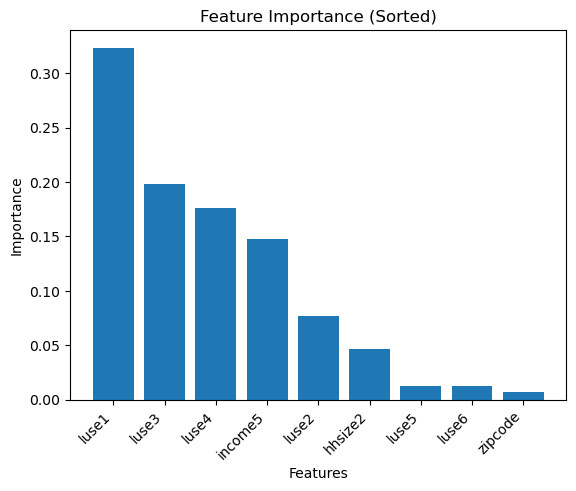

In [81]:
feature_importances = adaboost_rf_model.feature_importances_
feature_names = X.columns

# Create a dictionary to store feature names and their importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort features based on importance in descending order
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Extract sorted feature names and importances
sorted_feature_names, sorted_feature_importances = zip(*sorted_features)

# Create a bar plot to visualize sorted feature importances
plt.bar(sorted_feature_names, sorted_feature_importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance (Sorted)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [62]:
sorted_feature_names

('luse1',
 'luse3',
 'luse4',
 'income5',
 'luse2',
 'hhsize2',
 'luse5',
 'luse6',
 'zipcode',
 'children',
 'owner',
 'income6',
 'hhsize3',
 'income7',
 'hhsize4',
 'income3',
 'income4',
 'hhsize5',
 'income9',
 'hhsize5plus',
 'income2',
 'income8')

In [60]:
# for i,k in zip(sc_y.inverse_transform([y_test_scaled])[0], sc_y.inverse_transform([y_pred])[0]):
#     print(i,k)

In [53]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
mse = mean_squared_error(sc_y.inverse_transform([y_test_scaled]), sc_y.inverse_transform([y_pred]))
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1158922.6773490037


In [384]:
from sklearn.metrics import median_absolute_error

medae = median_absolute_error(sc_y.inverse_transform([y_test_scaled]), sc_y.inverse_transform([y_pred_xgb]))
print(f'Median Absolute Error: {medae}')

Median Absolute Error: 370.9759749006142


In [771]:
# Predict on the test set
y_pred = model.predict(X_test)

In [609]:
# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 75546463.36608055


In [772]:

# Evaluate model performance
mse = mean_squared_error(scaler_y.inverse_transform([y_test]), scaler_y.inverse_transform([y_pred]))
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1128379.5443577056


In [415]:
scaler_y.inverse_transform([y_test])

array([[ 311., 3558., 6159., ..., 5312., 4182., 6800.]])

In [414]:
scaler_y.inverse_transform([y_pred])

array([[ 346.13987786, 3558.        , 6156.85826304, ..., 5274.60399335,
        4203.66164896, 6766.91411907]])

In [612]:
# for p,r in zip(scaler_y.inverse_transform([y_test])[0], scaler_y.inverse_transform([y_pred])[0]):
#     if abs(p-r) > 1000:
#         print(p,r)

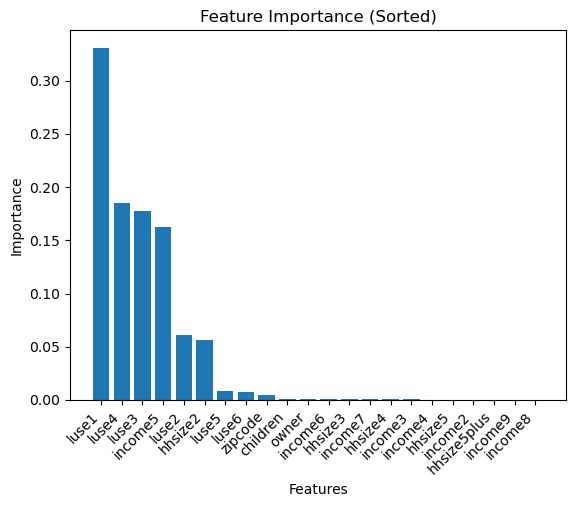

In [614]:
sorted_feature_names

('luse1',
 'luse4',
 'luse3',
 'income5',
 'luse2',
 'hhsize2',
 'luse5',
 'luse6',
 'zipcode',
 'children',
 'owner',
 'income6',
 'hhsize3',
 'income7',
 'hhsize4',
 'income3',
 'income4',
 'hhsize5',
 'income2',
 'hhsize5plus',
 'income9',
 'income8')

In [265]:
# Define the transformer
column_trans = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ["month"])
    ],
    remainder='passthrough'
)

# Fit and transform
X_transformed = column_trans.fit_transform(X)

# Get the feature names for the transformed columns
transformed_feature_names = list(column_trans.named_transformers_['encoder'].get_feature_names_out(['month']))

# Combine feature names and remaining column names
all_column_names = transformed_feature_names + list(X.columns.drop(["month"]))

# Create a DataFrame with the transformed data and column names
X_transformed_df = pd.DataFrame(X_transformed, columns=all_column_names)

ValueError: A given column is not a column of the dataframe

In [264]:
# Define the transformer
column_trans = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), ["month", "year"])
    ],
    remainder='passthrough'
)

# Fit and transform
X_transformed = column_trans.fit_transform(X)

# Get the feature names for the transformed columns
transformed_feature_names = list(column_trans.named_transformers_['encoder'].get_feature_names_out(['month', 'year']))

# Combine feature names and remaining column names
all_column_names = transformed_feature_names + list(X.columns.drop(["month", "year"]))

# Create a DataFrame with the transformed data and column names
X_transformed_df = pd.DataFrame(X_transformed, columns=all_column_names)

ValueError: A given column is not a column of the dataframe

In [272]:
X

,luse5,luse6,children,hhsize2,hhsize3,hhsize4,hhsize5,hhsize5plus,income2,income3,income4,income5,income6,income7,income8,income9,owner
80640,5.835415,5.801180,0.0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
80641,5.835415,5.801180,0.0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
80642,5.835415,5.801180,0.0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
80643,5.835415,5.801180,0.0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
80644,5.835415,5.801180,0.0,1,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318235,7.011101,6.785274,0.0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
318236,7.011101,6.785274,0.0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
318237,7.011101,6.785274,0.0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
318238,7.011101,6.785274,0.0,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [101]:
preprocessor = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), columns_to_scale)
    ],
    remainder='passthrough' 
)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

In [102]:
param_grid = {
    'model__n_estimators': [100, 200, 250,275,300],
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt', 'log2']
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [273]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [104]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('scaler',
                                                                         StandardScaler(),
                                                                         ['lusage',
                                                                          'luse1',
                                                                          'luse2',
                                                                          'luse3',
                                                                          'luse4',
                                                                          'luse5',
                                                                          'luse6'])])),
                                       ('model', RandomForestRegressor())]),
    

In [105]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Predict using the best model on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model performance on the test set
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error on Test Set: {mse}')

Mean Squared Error on Test Set: 110.57897238489788


In [106]:
best_params

{'model__max_depth': 30,
 'model__max_features': 'auto',
 'model__min_samples_leaf': 1,
 'model__min_samples_split': 2,
 'model__n_estimators': 300}

In [253]:
X_train_scaled

array([[-0.49956137, -0.49956137, -0.50087529, ..., -0.23885672,
        -0.17716214, -2.31436233],
       [-0.49956137,  2.00175606, -0.50087529, ..., -0.23885672,
        -0.17716214,  0.43208446],
       [-0.49956137,  2.00175606, -0.50087529, ..., -0.23885672,
        -0.17716214,  0.43208446],
       ...,
       [-0.49956137, -0.49956137,  1.99650496, ..., -0.23885672,
        -0.17716214,  0.43208446],
       [-0.49956137, -0.49956137,  1.99650496, ..., -0.23885672,
        -0.17716214, -2.31436233],
       [-0.49956137, -0.49956137, -0.50087529, ..., -0.23885672,
        -0.17716214,  0.43208446]])

In [249]:
# Standardize features
sc_X = StandardScaler()
X_train_scaled = sc_X.fit_transform(X_train)
X_test_scaled = sc_X.transform(X_test)

# Standardize target variable
sc_y = StandardScaler()
y_train_scaled = sc_y.fit_transform(np.array(y_train).reshape(-1, 1)).ravel()
y_test_scaled = sc_y.transform(np.array(y_test).reshape(-1, 1)).ravel()

In [250]:
model = RandomForestRegressor(max_depth = 30,max_features = 'auto',min_samples_leaf = 1,min_samples_split = 2,n_estimators = 300, random_state = 0)
model.fit(X_train_scaled, y_train_scaled )

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
mse = mean_squared_error(y_test_scaled, y_pred)
print(f'Mean Squared Error: {mse}')

RandomForestRegressor(max_depth=30, n_estimators=300, random_state=0)

In [251]:
# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate model performance
mse = mean_squared_error(y_test_scaled, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 6.067623574805429e-06


In [248]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y, test_size=0.2, random_state=42)

In [274]:
# Standardize the selected columns
scaler_x = StandardScaler()
X_train[columns_to_scale] = scaler_x.fit_transform(X_train[columns_to_scale])
X_test[columns_to_scale] = scaler_x.transform(X_test[columns_to_scale])

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(np.array(y_train).reshape(-1, 1)).ravel()
y_test = scaler_y.transform(np.array(y_test).reshape(-1, 1)).ravel()

In [275]:
model = RandomForestRegressor(max_depth = 30,max_features = 'auto',min_samples_leaf = 1,min_samples_split = 2,n_estimators = 300, random_state = 0)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=30, n_estimators=300, random_state=0)

In [276]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.0007987742105363771


In [9]:
model.feature_importances_

array([3.98400820e-03, 1.23571740e-07, 5.13118454e-07, 1.70313791e-03,
       1.95028574e-03, 1.19999883e-04, 3.13243917e-01, 6.97029457e-02,
       1.87333840e-01, 1.68564180e-01, 4.88540551e-03, 5.56892603e-03,
       4.84323756e-04, 5.68479706e-02, 3.48280758e-04, 2.78076528e-04,
       1.60716237e-04, 1.31646631e-04, 1.93649801e-04, 2.70345461e-04,
       2.25464180e-04, 1.82567250e-01, 3.84495000e-04, 3.28612360e-04,
       1.53892036e-04, 1.38667652e-04, 4.29326028e-04])

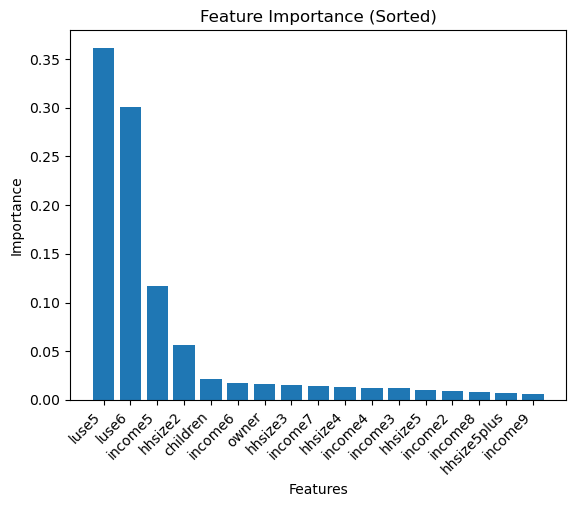

In [257]:
sorted_feature_names,sorted_feature_importances

(('luse6',
  'hhsize2',
  'owner',
  'hhsize3',
  'children',
  'income2',
  'hhsize5',
  'hhsize4',
  'hhsize5plus',
  'income3',
  'income8',
  'income4',
  'income9',
  'income7',
  'income5',
  'luse5',
  'income6',
  'luse2',
  'luse4',
  'month',
  'luse1',
  'year',
  'lusage',
  'luse3'),
 (0.31445982370455666,
  0.18808630074121524,
  0.1830758393231896,
  0.1691957303433569,
  0.0721209597623264,
  0.05698696055016691,
  0.00613059643280259,
  0.00541249810808034,
  0.0005830382147751519,
  0.0004481753005609058,
  0.0003306664992248407,
  0.00031980056990013774,
  0.00027921942378508443,
  0.0002466159075727477,
  0.00021158028346322073,
  0.0001720363575266127,
  0.00016772207681715147,
  3.8508408930478153e-07,
  3.326344367505906e-07,
  2.6840005468275946e-07,
  2.3661491967711573e-07,
  2.3518350820450153e-07,
  1.9003778034354705e-07,
  1.8610727031738082e-07))

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

In [ ]:
# Predict on the test set
y_pred = regressor.predict(X_test)

# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')